**Project: Hackathon Competition.**

**PROBLEM STATEMENT:**
As a data scientist of a leading decision analysis firm you are required to predict the potential global user of the game based on the data provided by the customer so that they can plan their global launch.

**ATTRIBUTE**/**FEATURES** **INFORMATION**:

*   Name - Game name

*   Platform - Running platform

*   Year of release

*   Genre - Game Genre

*   Publisher - game publisher

*   Critic_score - Aggregate score compiled by Metacritic staff

*   Criticcount - The number of critics used in coming up with the Critic Score

*   User_score - Score by Metacritic’s subscribers

*   Usercount - Number of users who gave the user score

*   Developer - Party responsible for creating the game

*   Rating - The ESRB ratings

*   EU_Sales - Sales in the European Union (in millions of units)

*   JP_Sales - Sales in Japan (in millions of units)

*   NA_Sales - Sales in North America (in millions of units)

*   Global_sales - Total sales in the world(in billions)






**Steps involved in model Building:**
 

*   Understanding the problem statement
*   Overview of the data


*   Data preparation / cleaning
*   Model biulding / choose model,trian and evaluate


*   Conclusion based on model

In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Colab Notebooks/PROJECT'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/PROJECT


**Import requried Libraries:**

In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

## Importing the dataset

In [ ]:
#reading the original data using csv file
data = pd.read_csv("Train.csv")
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [ ]:
#making the shallow copy of the data for EDA and data analysis 
#shalllow copy is made bcz  if any changes done that should not change in original data
df = data.copy()
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


**Overview of data:**

In [ ]:
#checking the data of first five rows using head option
#By default head shows only five rows but u can get any numbers of rows using df.head(number)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [ ]:
#to display maximum number of rows and columns instead of 1,2,.....,10
pd.set_option('display.max_columns', None )

In [ ]:
#to display maximum number of rows and columns instead of 1,2,.....,10
pd.set_option('display.max_rows', None )

In [ ]:
#checking the data of last five rows using tail option
#By default tail shows only five rows but u can get any numbers of rows using df.tail(number)
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14575,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [ ]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Data used for storing 
  #6 Notnull values of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


**Observations:**


*   There are 14576 rows and 15columns
*   All the variables/columns are  not label encoded , so both numeric columns   and categorical columns are seen
*   Data cleaning is required as there are null values,
*   Dependent variable is Global_Sales

In [ ]:
# checking the columns names 
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

In [ ]:
#selecting only object columns
object_cols=df.select_dtypes(include=['object']).columns.tolist()
object_cols

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

In [ ]:
#removing unwanted columns
object_cols.remove('User_Score')
object_cols

['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

In [ ]:
#selecting only numeric columns 
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Global_Sales']

In [ ]:
#checking the shape of data
df.shape

(14576, 15)

### Checking Null values and treating if found..

In [ ]:
#Filtering the missing values 
#checking the null values in dataset using df.isnull() command 
#to_list  creates the list of the output of null values with the sum of nullvalues of every column
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [ ]:
#percentage of null values..
df.isnull().sum()* 100 / len(df)

Name                0.013721
Platform            0.000000
Year_of_Release     1.591658
Genre               0.013721
Publisher           0.336169
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Critic_Score       50.487102
Critic_Count       50.487102
User_Score         39.901207
User_Count         53.375412
Developer          39.427827
Rating             40.285401
Global_Sales        0.000000
dtype: float64

In [ ]:
#first let's replace all numeric columns missing values with median
#select only numeric columns and storing all those in list(numeric_columns)
median=lambda x:x.fillna(x.median())
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols]=df[numeric_cols].apply(median,axis=0)

In [ ]:
#now let's replace all categorical columns missing values with mode
#select only numeric columns and storing all those in list(float_columns)
modeFiller = lambda x: x.fillna(x.mode()[0])
object_cols= df.select_dtypes(include='object').columns.tolist()
df[object_cols]= df[object_cols].apply(modeFiller, axis=0)

In [ ]:
#verify...
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

**Description of every columns:**

In [ ]:
#include all includes all datatype columns in dataset like object or float or int columns
#describe is used for getting every info of columns like
 #If the column datatype is object it shows all the unique values,topmost value,frequency of column
 #If the column datatype is number(float,int) it shows mean,median,standard deviation,quantile of every column
df.describe(include="all")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
count,14576,14576,14576.000000,14576,14576,14576.000000,14576.000000,14576.000000,14576.000000,14576.000000,14576,14576.000000,14576,14576,14576.000000
unique,10327,31,NaN,12,552,NaN,NaN,NaN,NaN,NaN,96,NaN,1577,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,13,1935,NaN,2976,1316,NaN,NaN,NaN,NaN,NaN,7780,NaN,5918,9332,NaN
mean,NaN,NaN,2006.446076,NaN,NaN,0.295577,0.163957,0.085659,70.344470,24.630145,NaN,94.844882,NaN,NaN,0.598972
std,NaN,NaN,5.908494,NaN,NaN,0.866491,0.536354,0.329646,9.713944,13.950742,NaN,400.342893,NaN,NaN,1.647699
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,13.000000,3.000000,NaN,4.000000,NaN,NaN,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,71.000000,22.000000,NaN,27.000000,NaN,NaN,0.050000
50%,NaN,NaN,2007.000000,NaN,NaN,0.100000,0.030000,0.000000,71.000000,22.000000,NaN,27.000000,NaN,NaN,0.220000
75%,NaN,NaN,2010.000000,NaN,NaN,0.280000,0.130000,0.030000,71.000000,22.000000,NaN,27.000000,NaN,NaN,0.550000


In [ ]:
#checking the datatype of all columns
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

##Unique value of columns:

In [ ]:
df.Name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [ ]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [ ]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
df.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
     

In [ ]:
df.NA_Sales.unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

In [ ]:
df.EU_Sales.unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

In [ ]:
df.JP_Sales.unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

In [ ]:
df.Critic_Score.unique()

array([76., 71., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64., 75.,
       60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47., 65.,
       54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51., 40.,
       46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23., 24.,
       17., 13.])

In [ ]:
df.Critic_Count.unique()

array([ 51.,  22.,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,  19.,
        48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,  40.,
       101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,  49.,
        60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,  93.,
         5.,   6., 103., 102., 106.,   3., 104.])

In [ ]:
df.User_Score.unique()

array(['8', 'tbd', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'], dtype=object)

In [ ]:
#removing garbage data
df.User_Score.replace('tbd',7.1,inplace=True)

In [ ]:
#Verify...
df.User_Score.unique()

array(['8', 7.1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'], dtype=object)

In [ ]:
#converting datatype into numeric..
df.User_Score=pd.to_numeric(df.User_Score)

In [ ]:
df.User_Count.unique()

array([3.2200e+02, 2.7000e+01, 7.0900e+02, 1.9200e+02, 4.3100e+02,
       1.2900e+02, 5.9400e+02, 4.6400e+02, 1.4600e+02, 1.0600e+02,
       5.2000e+01, 3.9940e+03, 1.5880e+03, 5.0000e+01, 3.7110e+03,
       7.3000e+02, 1.9000e+01, 3.1400e+02, 8.7130e+03, 1.4540e+03,
       9.2200e+02, 2.2560e+03, 2.6980e+03, 5.2340e+03, 6.6400e+02,
       1.6620e+03, 6.3200e+02, 1.0940e+03, 2.8990e+03, 2.4200e+02,
       4.1000e+03, 2.7200e+02, 2.1470e+03, 2.9510e+03, 1.3800e+02,
       9.2100e+02, 1.1120e+03, 2.0730e+03, 2.8330e+03, 2.1170e+03,
       1.6000e+01, 4.2400e+02, 2.0450e+03, 1.2820e+03, 3.2600e+03,
       1.3500e+02, 2.4000e+01, 1.0470e+03, 1.3200e+03, 6.2600e+02,
       8.5000e+01, 3.5890e+03, 8.9600e+02, 1.2180e+03, 5.4000e+01,
       1.9000e+02, 3.4800e+02, 1.0560e+03, 8.8600e+02, 6.4400e+02,
       2.0300e+02, 4.5100e+02, 1.4430e+03, 3.9800e+02, 1.8540e+03,
       5.8000e+02, 2.1420e+03, 1.7100e+02, 1.1000e+02, 1.7610e+03,
       4.2280e+03, 3.6700e+02, 1.6580e+03, 4.3200e+02, 1.5990e

In [ ]:
df.Developer.unique()

array(['Nintendo', 'Ubisoft', 'Good Science Studio', ...,
       'Big Red Software', 'Atomic Games', 'Interchannel-Holon'],
      dtype=object)

In [ ]:
df.Rating.unique()

array(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
df.Global_Sales.unique()

array([8.253e+01, 4.024e+01, 3.552e+01, 3.277e+01, 3.137e+01, 3.026e+01,
       2.980e+01, 2.892e+01, 2.832e+01, 2.831e+01, 2.467e+01, 2.321e+01,
       2.310e+01, 2.270e+01, 2.181e+01, 2.179e+01, 2.104e+01, 2.081e+01,
       2.061e+01, 2.015e+01, 1.825e+01, 1.814e+01, 1.728e+01, 1.627e+01,
       1.615e+01, 1.585e+01, 1.529e+01, 1.514e+01, 1.498e+01, 1.473e+01,
       1.464e+01, 1.463e+01, 1.461e+01, 1.460e+01, 1.379e+01, 1.367e+01,
       1.347e+01, 1.332e+01, 1.310e+01, 1.284e+01, 1.266e+01, 1.263e+01,
       1.261e+01, 1.213e+01, 1.212e+01, 1.189e+01, 1.177e+01, 1.168e+01,
       1.166e+01, 1.135e+01, 1.118e+01, 1.101e+01, 1.095e+01, 1.081e+01,
       1.070e+01, 1.060e+01, 1.055e+01, 1.050e+01, 1.049e+01, 1.030e+01,
       1.025e+01, 1.012e+01, 9.900e+00, 9.870e+00, 9.860e+00, 9.720e+00,
       9.710e+00, 9.490e+00, 9.440e+00, 9.360e+00, 9.310e+00, 9.300e+00,
       9.180e+00, 9.160e+00, 8.910e+00, 8.790e+00, 8.760e+00, 8.570e+00,
       8.490e+00, 8.380e+00, 8.270e+00, 8.160e+00, 

**Observations:**


*   Every columns unique values are found and all columns have normal values except one column i.e User_Score column 
*   In User_Score we found garbage data something like "tbd" so we replaced it with median of that column



## Univariate Analysis:

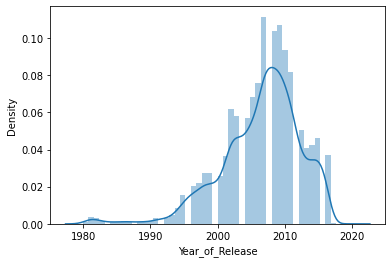

In [ ]:
sns.distplot(df.Year_of_Release)

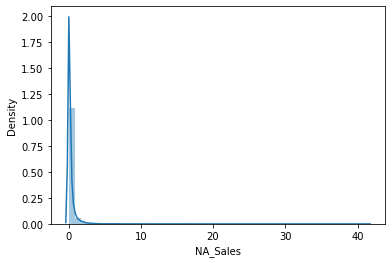

In [ ]:
sns.distplot(df.NA_Sales)

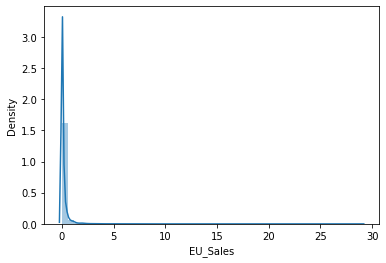

In [ ]:
sns.distplot(df.EU_Sales)

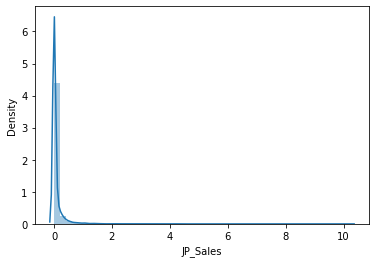

In [ ]:
sns.distplot(df.JP_Sales)

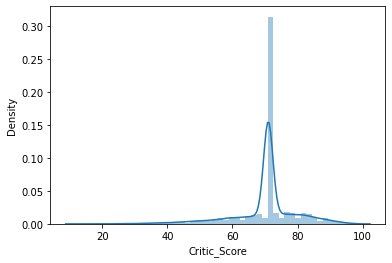

In [ ]:
sns.distplot(df.Critic_Score)

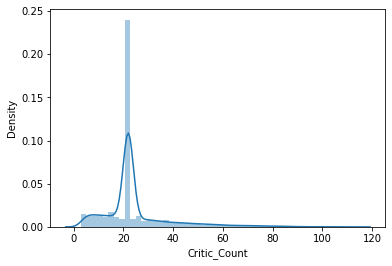

In [ ]:
sns.distplot(df.Critic_Count)

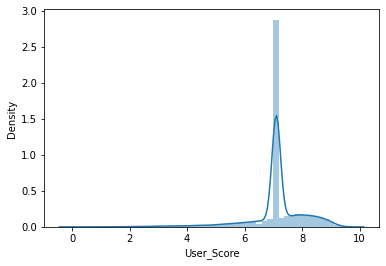

In [ ]:
sns.distplot(df.User_Score)

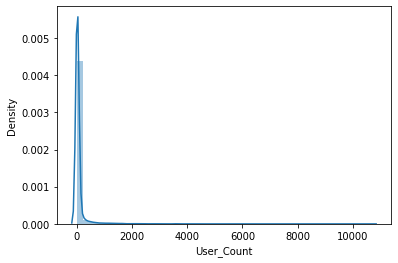

In [ ]:
sns.distplot(df.User_Count)

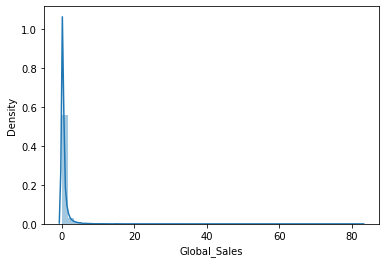

In [ ]:
sns.distplot(df.Global_Sales)

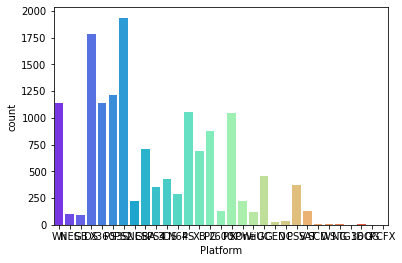

In [ ]:
sns.countplot(df.Platform,data=df,palette = "rainbow")
plt.show()

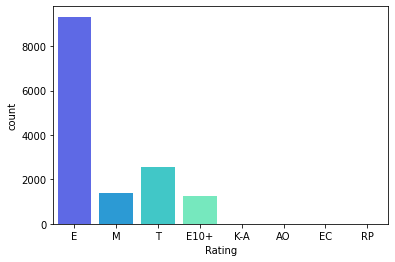

In [ ]:
sns.countplot(df.Rating,data=df,palette = "rainbow")
plt.show()

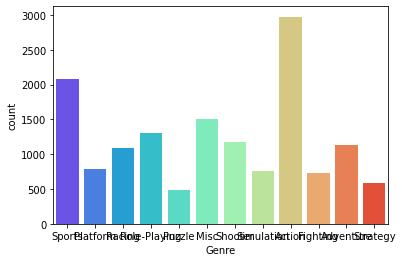

In [ ]:
sns.countplot(df.Genre,data=df,palette = "rainbow")
plt.show()

##Multivariate Analysis:

In [ ]:
#correlation of every columns
#diagonal value will be always eqaul to 1 bcz correlation of its own value is always 1.
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
Year_of_Release,1.000000,-0.095565,0.006070,-0.176927,-0.003348,0.138725,0.124302,-0.078720
NA_Sales,-0.095565,1.000000,0.763139,0.446972,0.178876,0.240121,0.210704,0.940451
EU_Sales,0.006070,0.763139,1.000000,0.432235,0.185855,0.260019,0.274891,0.900325
JP_Sales,-0.176927,0.446972,0.432235,1.000000,0.096501,0.090294,0.033354,0.610518
Critic_Score,-0.003348,0.178876,0.185855,0.096501,1.000000,0.405523,0.253469,0.195111
Critic_Count,0.138725,0.240121,0.260019,0.090294,0.405523,1.000000,0.397820,0.259365
User_Count,0.124302,0.210704,0.274891,0.033354,0.253469,0.397820,1.000000,0.237207
Global_Sales,-0.078720,0.940451,0.900325,0.610518,0.195111,0.259365,0.237207,1.000000


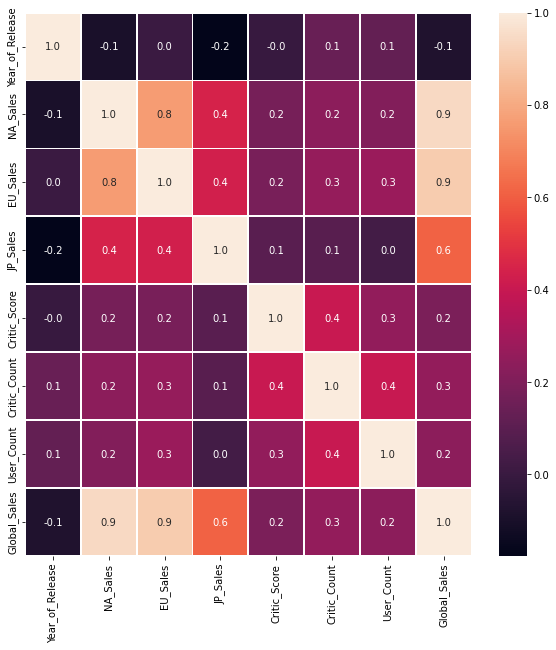

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.9, fmt= '.1f',ax=ax)

**Histogram and Barplots:**

In [ ]:
#let us write a function that will help us create boxplot and histogram for any input numerical variable
#this function takes numerical column as input and return boxplots and histogram for the variable

def histogram_boxplot(feature,figsize=(15,10),bins=None):
  """ Boxplot and histogram combined 
  feature :1-d feature array
  figsize:size of fig (default(9,8))
  bins: number of bins (default None/auto)
  """
  sns.set(font_scale=2) #setting the font scale of the seaborn
  f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2, #number of rows of the subplot grid=2
                                     sharex=True, #x axis will be shared among all subplots
                                     gridspec_kw={"height_ratios":(0.25,0.75)},
                                     figsize=figsize
                                     ) #creating the 2 subplots
  sns.boxplot(feature,ax=ax_box2,showmeans=True,color="red") #box plot will be created and a star
  sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins) if bins else sns.distplot(feature,kde=False,ax=ax_hist2)

  ax_hist2.axvline(np.mean(feature),color="g",linestyle="--") #add mean to the histogram
  ax_hist2.axvline(np.median(feature),color="black",linestyle="-") #add median to the histogram

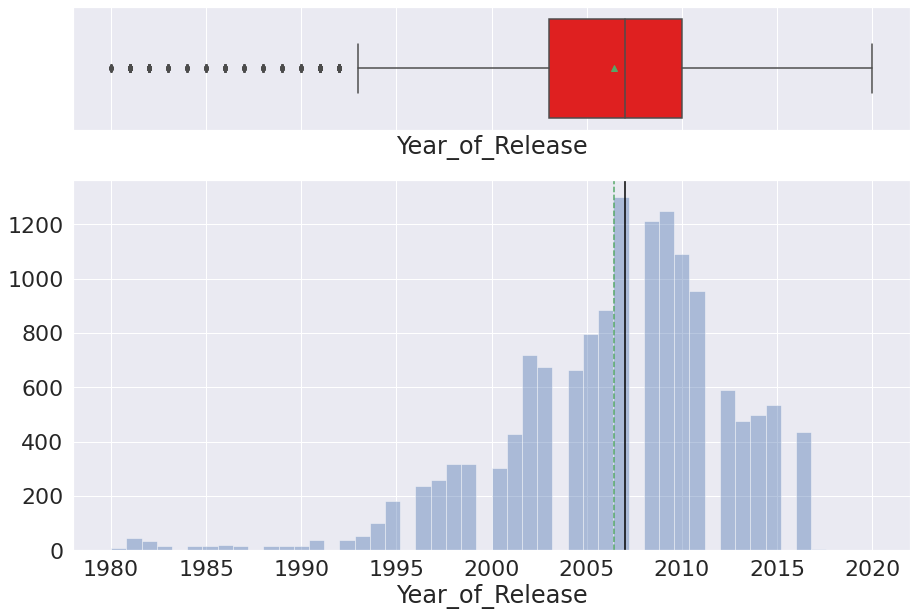

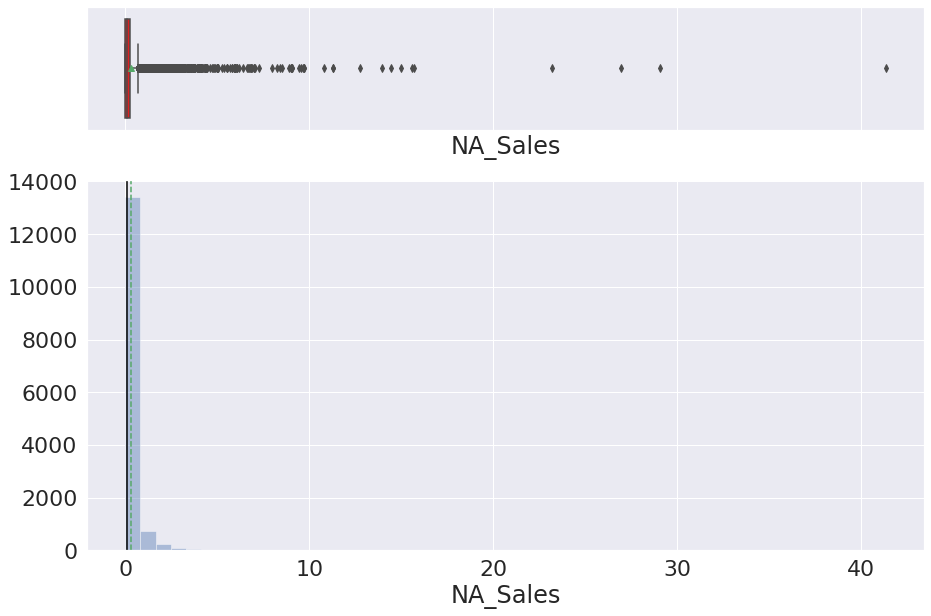

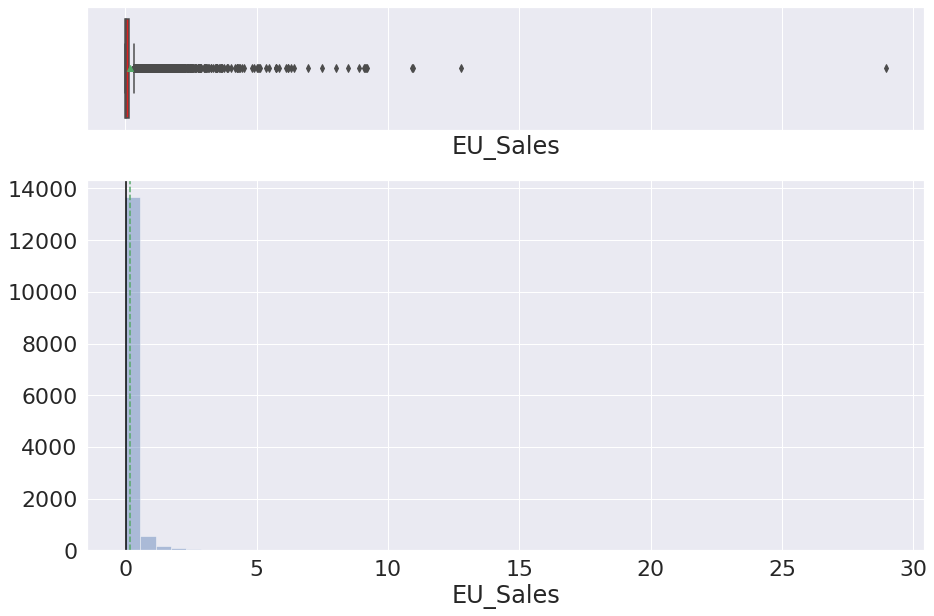

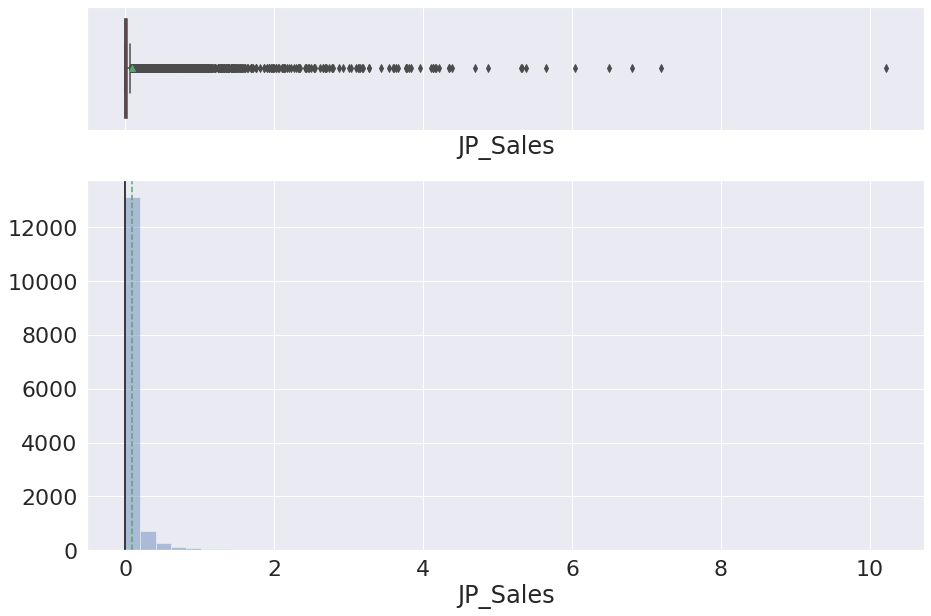

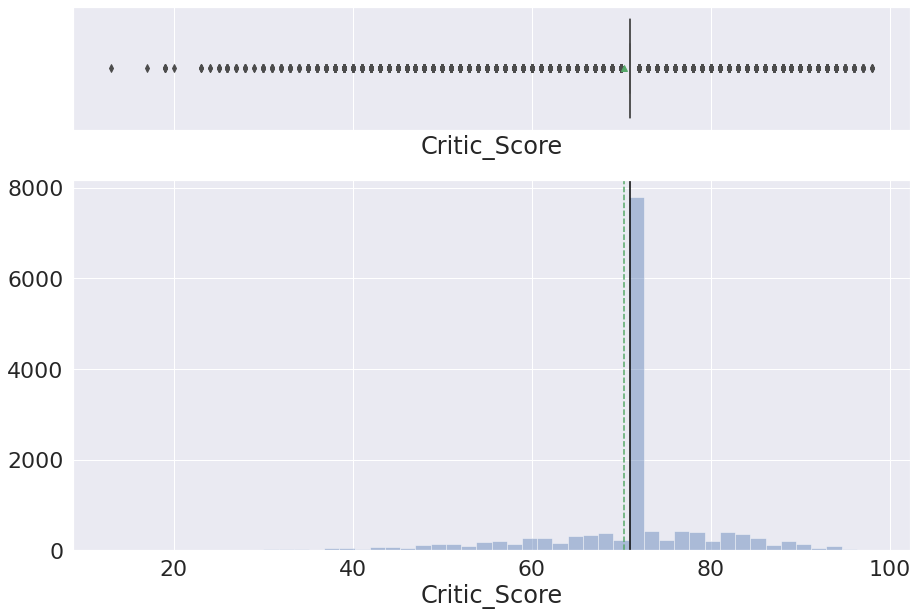

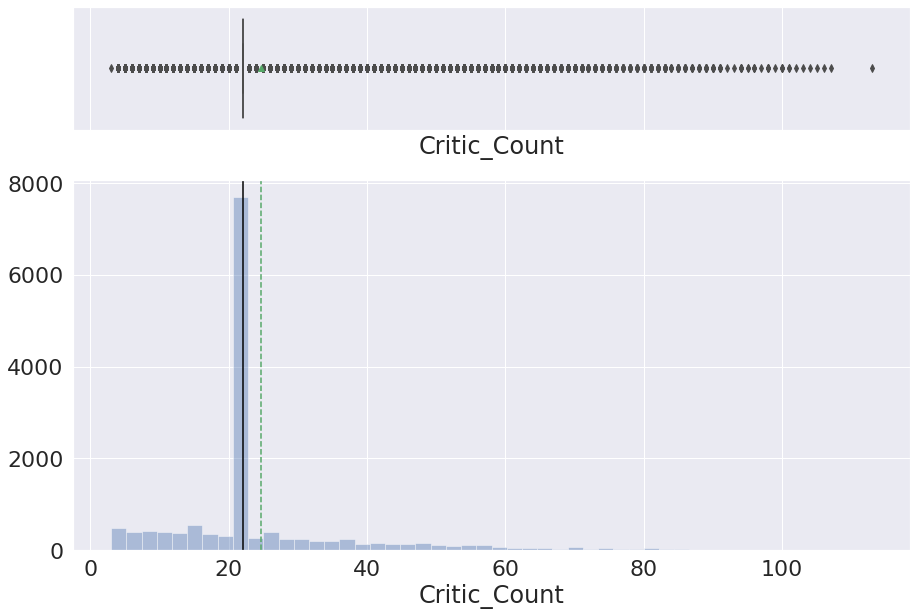

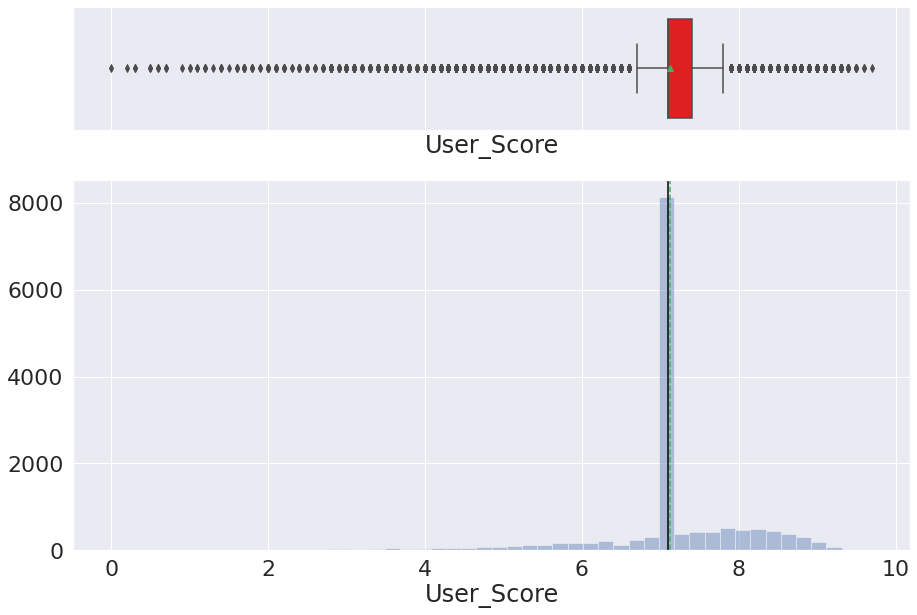

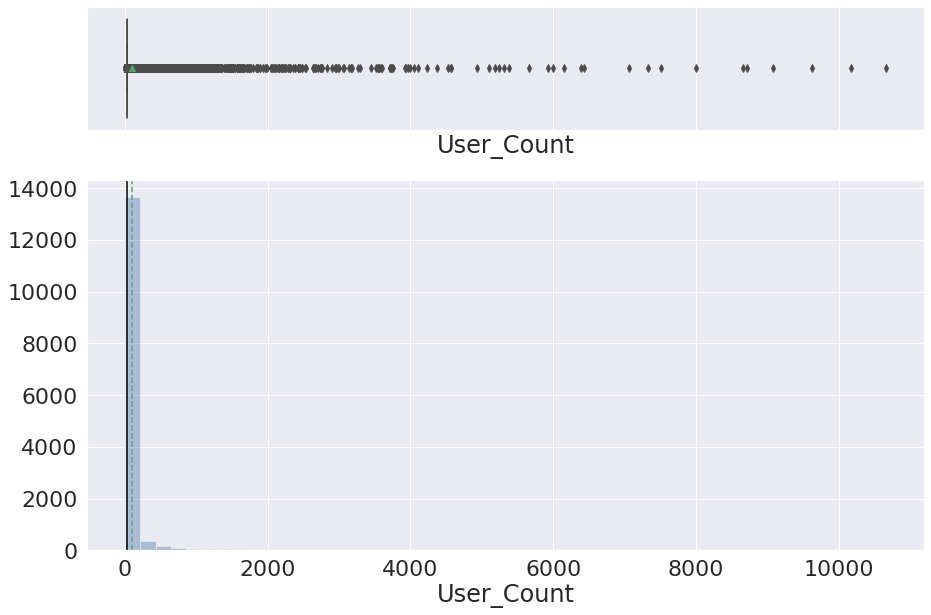

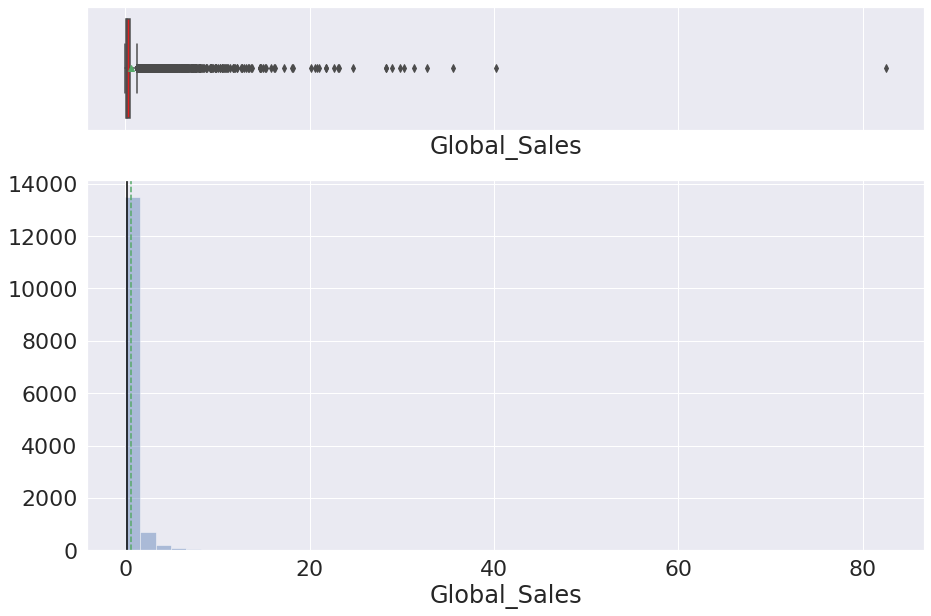

In [ ]:
#plotting histogram boxplot of every numeric columns in one for loop 
for feature in numeric_cols:
  histogram_boxplot(df[feature],figsize=(15,10),bins=None)
  plt.show()

##Checking outliers and treating:

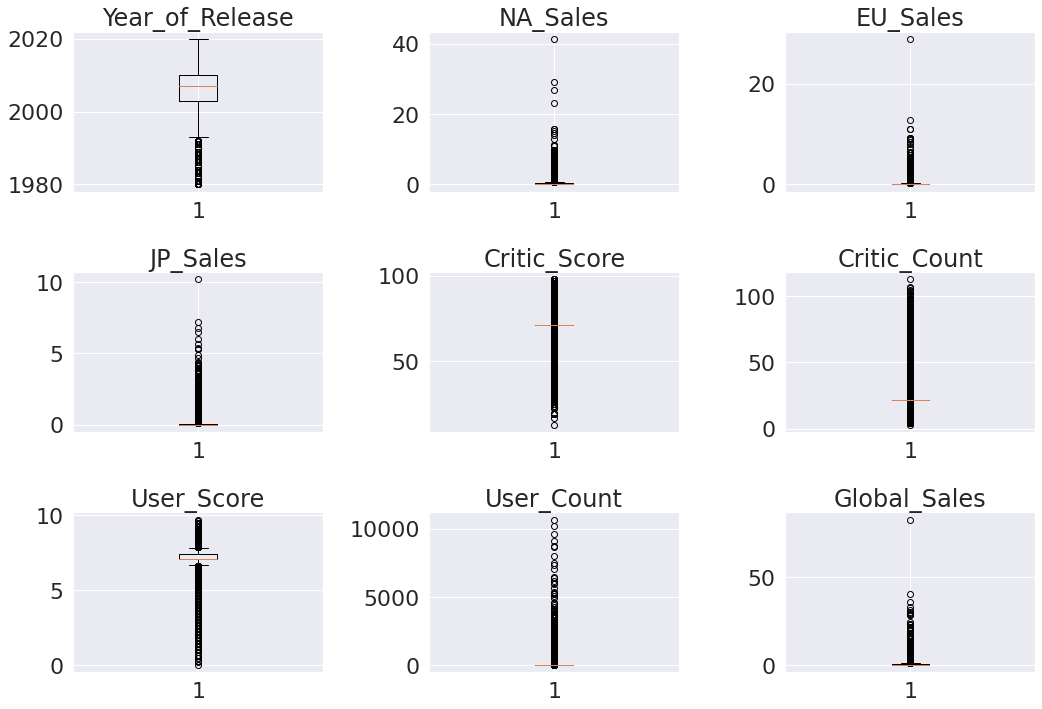

In [ ]:
#Outliers Detection Using Box Plot
# to plot the box plot of all the columns to find the outhliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,3,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)

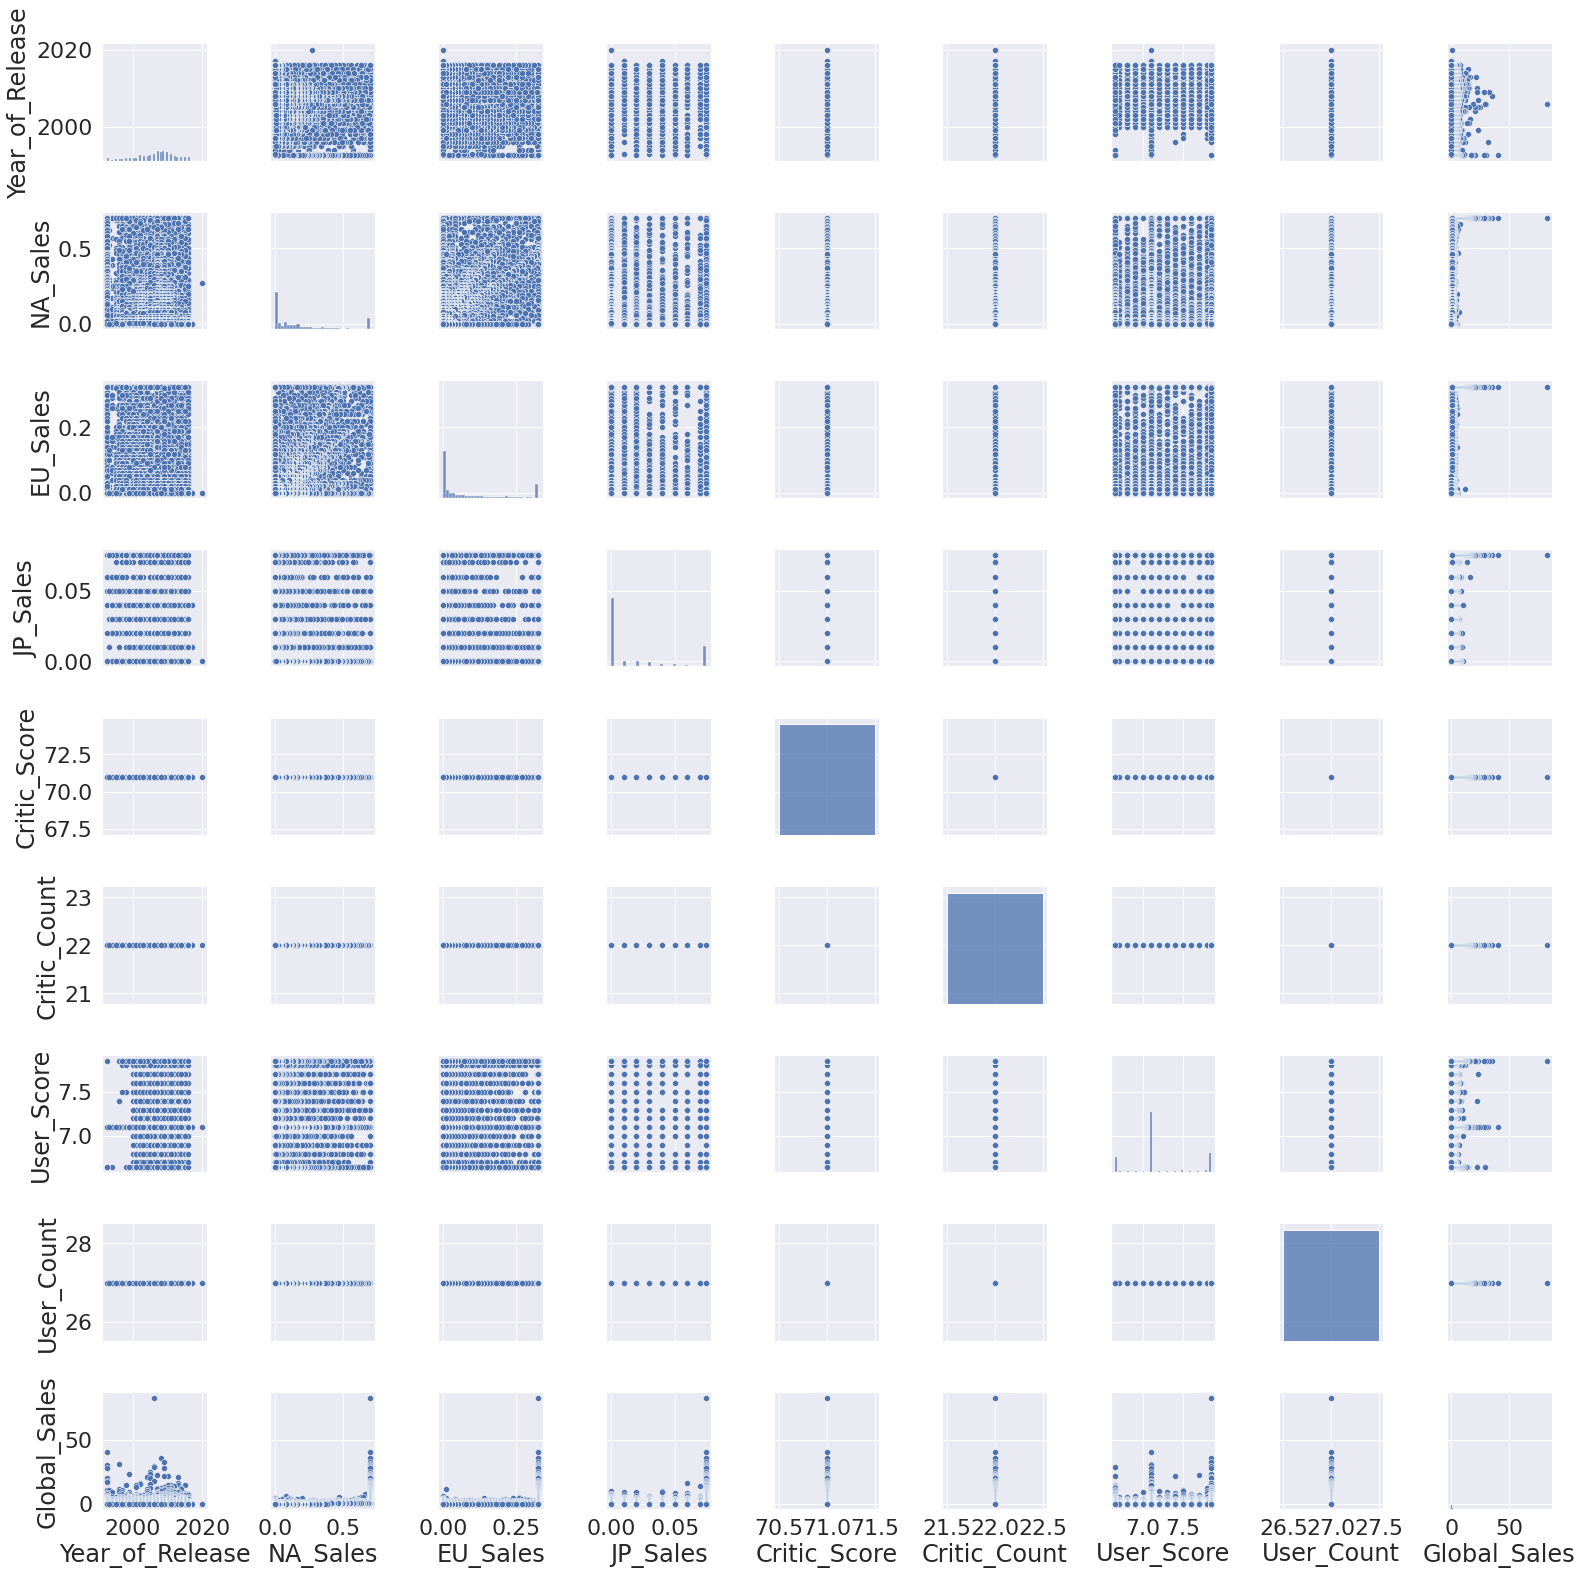

In [ ]:
sns.pairplot(df)


In [ ]:
#removing target variabe
numeric_cols.remove('Global_Sales')

In [ ]:
#outliers treatment 
#clipping method is used for outliers treatment 
#In the given code below first it gets q1,q3 and IQR of every column and clipping process is done for outliers treatment
#for outliers treatment we can use np.clip and np.where for cliiping purpose 
for feature in numeric_cols :
  Q1=df[feature].quantile(0.25)
  Q3=df[feature].quantile(0.75)
  IQR=Q3-Q1
  Upper_whisker=Q3+1.5*IQR
  Lower_whisker=Q1-1.5*IQR
  df[feature] = np.where(df[feature] <Lower_whisker,Lower_whisker ,df[feature])
  df[feature] = np.where(df[feature] >Upper_whisker, Upper_whisker,df[feature])

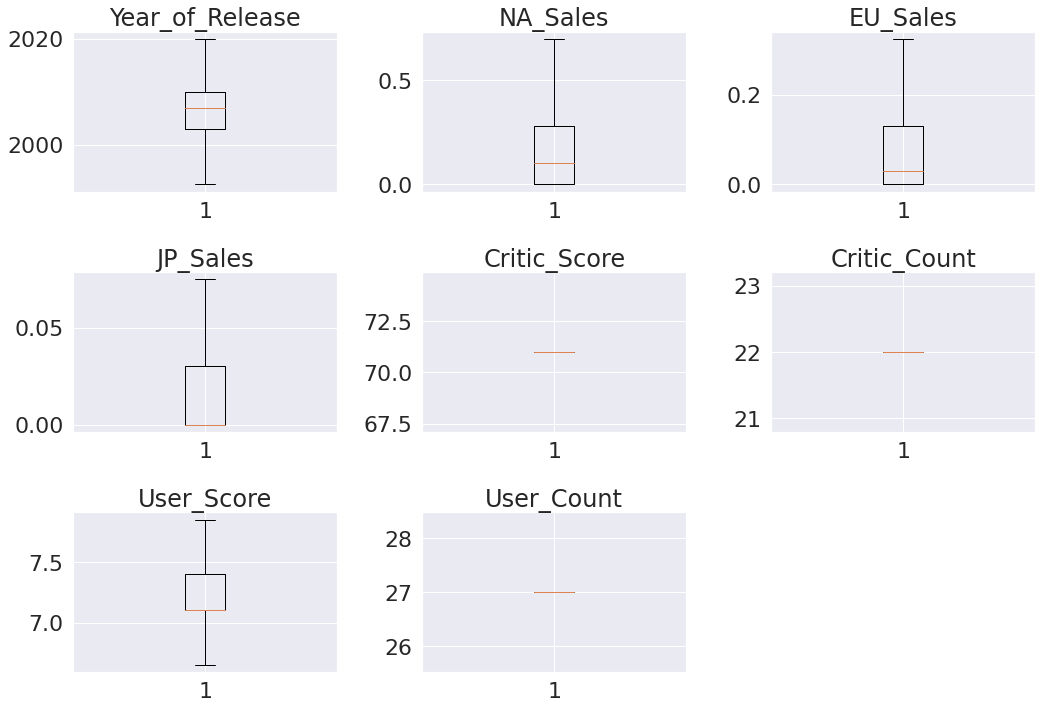

In [ ]:
#verify
#Outliers Detection Using Box Plot
# to plot the box plot of all the columns to find the outhliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,3,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)

#Splitting the data into X and Y:



In [ ]:
#split the dependent and independent variable 
x = df.drop(['Global_Sales'], axis=1)
y = df[['Global_Sales']]

print(x.head())
print(y.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1992.5      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Critic_Score  Critic_Count  User_Score  \
0       0.7     0.325     0.075          71.0          22.0        7.85   
1       0.7     0.325     0.075          71.0          22.0        7.10   
2       0.7     0.325     0.075          71.0          22.0        7.85   
3       0.7     0.325     0.075          71.0          22.0        7.85   
4       0.7     0.325     0.075          71.0          22.0        7.10   

   User_Count Developer Rating  
0        27.0  Nintendo      

In [ ]:
#label encoding for categorical columns..
x=pd.get_dummies(x,columns=['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'],drop_first=True)

In [ ]:
#checking the shape 
x.shape

(14576, 12509)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
#checking the shape of splited data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11660, 12509) (2916, 12509) (11660, 1) (2916, 1)


##Model building using Random forest regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from pandas.core.common import random_state
rf=RandomForestRegressor(random_state=7)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=7)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#predicting for train data
pred_train1=rf.predict(x_train)

In [ ]:
#predicting for test data
pred_test1=rf.predict(x_test)

In [ ]:
mean_absolute_error(y_train,pred_train1)
mean_absolute_error(y_test,pred_test1)
print(mean_absolute_error(y_train,pred_train1))
print(mean_absolute_error(y_test,pred_test1))

0.06772596912521443
0.18663086419753086


In [ ]:
#RMSE for train data
mean_squared_error(y_train,pred_train1)**0.5

0.4747381515949188

In [ ]:
#RMSE for test data
mean_squared_error(y_test,pred_test1)**0.5

1.1937730636041473

In [ ]:
#adjusted Rsquare for train data
r2_score(y_train,pred_train1)   
print(1-(1-r2_score(y_train, pred_train1))*((len(x_train)-1)/(len(x_train)-len(x_train.columns)-1)))

2.155979811670412


In [ ]:
#adjusted R square for test data
r2_score(y_test,pred_test1)   
print(1-(1-r2_score(y_test, pred_test1))*((len(x_test)-1)/(len(x_test)-len(x_test.columns)-1)))

1.1505238361611532


##Tunning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_estimator=RandomForestRegressor(random_state=7)
parameters={
          'n_estimators':[10],
           'min_samples_leaf':np.arange(1,6,1),
           'max_features':['auto'],
           'max_samples':[0.9,None],
          }
 

grid_obj =RandomizedSearchCV(rf_estimator,parameters,n_jobs=-1,n_iter=50,scoring='recall',cv=5)
grid_obj=grid_obj.fit(x_train,y_train)
rf_estimator=grid_obj.best_estimator_
rf_estimator.fit(x_train,y_train)

RandomForestRegressor(max_samples=0.9, n_estimators=10, random_state=7)

In [ ]:
#predicting for train data
pred_train2=rf_estimator.predict(x_train)

In [ ]:
#predicting for test data
pred_test2=rf_estimator.predict(x_test)

In [ ]:
mean_absolute_error(y_train,pred_train2)
mean_absolute_error(y_test,pred_test2)
print(mean_absolute_error(y_train,pred_train2))
print(mean_absolute_error(y_test,pred_test2))

0.07942264150943397
0.190812414266118


In [ ]:
#RMSE for train data
mean_squared_error(y_train,pred_train2)**0.5

0.5829641338055045

In [ ]:
#RMSE for test data
mean_squared_error(y_test,pred_test2)**0.5

1.2279364939868618

In [ ]:
#adjusted Rsquare for train data
r2_score(y_train,pred_train2)   
print(1-(1-r2_score(y_train, pred_train2))*((len(x_train)-1)/(len(x_train)-len(x_train.columns)-1)))

2.743113444990043


In [ ]:
#adjusted R square for test data
r2_score(y_test,pred_test2)   
print(1-(1-r2_score(y_test, pred_test2))*((len(x_test)-1)/(len(x_test)-len(x_test.columns)-1)))

1.1592625044736633


##Conclusion:

RMSE for train - 0.58

RMSE for test -  1.22

As there is not much difference between train and test results , model is said to be well fitted and can be considered for predicting global sales for launching the game.
